# Milestone 2 notebook 
<p> In this notebook we have compiled most of our work towards milestone 2. Note that it might not contain everything we have done as some of our work has been not conclusive enough or still computing so we havent put it in here. 
This notebook provides information about our work up to now. 
To refer about our discussion and where the project is going to next and our final goal you can refer to the <a href="./README.md"> README file </a> which contains more information. 
 
    
</p>

In [1]:
import pandas as pd
import numpy as np
import scipy as scp
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
DATAPATH='data/'

In [3]:
data = pd.read_csv(DATAPATH+'openfoodfacts.csv',delimiter='\t',low_memory=False)

In [4]:
print(data.shape)
print(data["code"].value_counts().count()) 
print(data["manufacturing_places_tags"].value_counts().count()) 
print(data["manufacturing_places"].value_counts().count()) 
print(data["categories"].value_counts().count())
print(data["origins_tags"].value_counts().count()) 

data.head()

(665697, 174)
665659
11446
12534
61613
6490


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1523440823,2018-04-11T10:00:23Z,Salade de carottes râpées,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#fasters than pd.Series.corr(...)
def correlation_columns(column1,column2,dataset=data):
    matrix=dataset[[column1,column2]].dropna().values
    return scp.stats.spearmanr(matrix[:,0],matrix[:,1])

In [6]:
#example of use of the correlation function
print(correlation_columns('energy-from-fat_100g','fat_100g'))
print(correlation_columns('energy_100g','fat_100g'))
print(correlation_columns('energy_100g','energy-from-fat_100g'))
print(correlation_columns('energy_100g','salt_100g'))
print(correlation_columns('salt_100g','fat_100g'))

SpearmanrResult(correlation=0.9642065075130063, pvalue=0.0)
SpearmanrResult(correlation=0.7276323408917151, pvalue=0.0)
SpearmanrResult(correlation=0.7673307503853053, pvalue=2.085739219717803e-177)
SpearmanrResult(correlation=0.11789138476826279, pvalue=0.0)
SpearmanrResult(correlation=0.3325211853717805, pvalue=0.0)


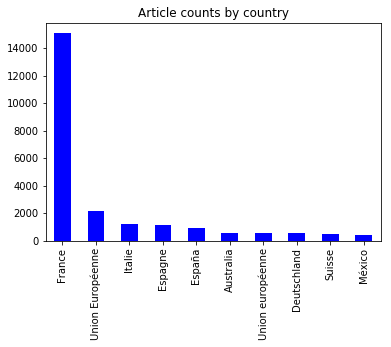

In [7]:
# Let us examine the origin of the articles.
data.set_index('code',inplace=True)
origin_cnt = data[["origins"]]
flatmap = origin_cnt["origins"].str.split(',').apply(pd.Series).unstack().dropna().to_frame()

flatmap.columns = ["origins"]
flatmap = flatmap.reset_index().set_index("code")
flatmap = flatmap[["origins"]]
flatmap = flatmap["origins"].value_counts()
# only take the ten most significant. 
top_ten = flatmap[flatmap > 5].nlargest(10)
top_ten.plot.bar(color='b')
flatmap_all = flatmap # to be used later. 
plt.title("Article counts by country")
plt.show()
data.reset_index(inplace=True)

- We can see most of our articles come from France this must be kept in mind when we work on our project ! 

# Get rid of dupplicates

<p> We will use the code as unique index. However some articles dont have codes. Hence we use dummy codes that are not taken yet in order to get a nice unique index. </p>

In [8]:
# Check values thave haveno code value. 
null_code = data[pd.isnull(data['code'])].shape[0]
print(null_code)
start_dummy_code = 10000000000000
end_dummy_code = 10000000000000+null_code
dummy_code = list(range(start_dummy_code,end_dummy_code+1))


for i,row in enumerate(data[pd.isnull(data['code'])].index):
    data.loc[[row],['code']] = dummy_code[i]


34


In [9]:
# investigate duplicates. 
data[data.duplicated(subset=['code'],keep=False)]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
391448,3480580000121,http://world-en.openfoodfacts.org/product/3480...,kiliweb,1534144276,2018-08-13T07:11:16Z,1537180124,2018-09-17T10:28:44Z,Arachides sucrees,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391449,3480580000121,http://world-en.openfoodfacts.org/product/3480...,kiliweb,1534144276,2018-08-13T07:11:16Z,1539357604,2018-10-12T15:20:04Z,Arachides Sucrées,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421916,3596701440535,http://world-en.openfoodfacts.org/product/3596...,openfoodfacts-contributors,1537044583,2018-09-15T20:49:43Z,1537045183,2018-09-15T20:59:43Z,blanc de dinde,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421917,3596701440535,http://world-en.openfoodfacts.org/product/3596...,openfoodfacts-contributors,1537044583,2018-09-15T20:49:43Z,1537045244,2018-09-15T21:00:44Z,blanc de dinde,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441055,3700446410957,http://world-en.openfoodfacts.org/product/3700...,openfoodfacts-contributors,1537012708,2018-09-15T11:58:28Z,1537174585,2018-09-17T08:56:25Z,myrtille bio,NaN,118g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441056,3700446410957,http://world-en.openfoodfacts.org/product/3700...,openfoodfacts-contributors,1537012708,2018-09-15T11:58:28Z,1537174704,2018-09-17T08:58:24Z,myrtille bio,NaN,118g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559773,6003326008341,http://world-en.openfoodfacts.org/product/6003...,beniben,1537967806,2018-09-26T13:16:46Z,1537970130,2018-09-26T13:55:30Z,Pilsener,Beer - Pilsener,330 ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559774,6003326008341,http://world-en.openfoodfacts.org/product/6003...,beniben,1537967806,2018-09-26T13:16:46Z,1537970162,2018-09-26T13:56:02Z,Pilsener,Beer - Pilsener,330 ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- We see that the duplicated data can be dropped safely as they are just articles that have been entered twice, and we can then set our index...

In [10]:
# Drop duplicates, set index, and check if ok. 
data = data.drop_duplicates(subset=['code'],keep="first")
data.set_index('code',inplace=True)
data.index.is_unique

True

<p> We now have unique index and we can save the file </p>

In [11]:
data.to_csv(DATAPATH+"/cleaned_unique_index.csv")

Data for distance computation

In [12]:
a = ~data["first_packaging_code_geo"].isnull() # 27572
b = ~data["origins_tags"].isnull()
c = ~data["manufacturing_places_tags"].isnull()

sele = a|b|c  # 88001

data_loc = data[sele] # 88001 
print(data_loc.shape)
# data_loc = data_loc[sele]
data_loc[["origins_tags","origins_tags","manufacturing_places_tags"]].to_csv(DATAPATH+'food_origins.csv')

(86142, 173)


Data for palm computation
<p> We are interested in isolating information about palm oil. </p>

In [13]:
palm_oil = []
for col in data.columns:
    ## keep columns that have info about palm oil.. 
    if ("palm_oil") in col:
        palm_oil.append(col)

# Drop rows that have absolutely no information about palm_oil.         
palm_oil_data = data.dropna(how='all',subset=palm_oil)[palm_oil]
palm_oil_data.head()

,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags
code,,,,,,
0000000001199,0.0,NaN,NaN,0.0,NaN,NaN
0000000001663,0.0,NaN,NaN,0.0,NaN,NaN
0000000002264,0.0,NaN,NaN,0.0,NaN,NaN
0000000003827,0.0,NaN,NaN,0.0,NaN,NaN
0000000004510,0.0,NaN,NaN,0.0,NaN,NaN


In [14]:
palm_oil_data.to_csv(DATAPATH+'palm_oil.csv',columns=palm_oil_data.columns,index=True)

Data for labels

In [15]:
labels =[]
for col in data.columns:
    #isolate columns with info about labels. 
    if ("labels") in (col):
        labels.append(col)
print("Columns for label : " + str(labels))

# drop articles with no info about labels.
labels_data = data.dropna(how='all',subset=labels)[labels]
labels_data.head()


Columns for label : ['labels', 'labels_tags', 'labels_en']


,labels,labels_tags,labels_en
code,,,
0000000020114,Fabriqué en France,en:made-in-france,Made in France
0000000274722,"Viande Française,Fabriqué en France","fr:viande-francaise,en:made-in-france","fr:Viande Française,Made in France"
0000003444009,Contient des OGM,en:contains-gmos,Contains GMOs
0000005200016,AB,"en:organic,en:eu-organic,fr:ab-agriculture-bio...","Organic,EU Organic,fr:AB Agriculture Biologique"
0000007020254,"Kascher,Contient des OGM","en:kosher,en:contains-gmos","Kosher,Contains GMOs"


In [16]:
labels_data.to_csv(DATAPATH+'labels.csv',columns=labels_data.columns,index=True)

Data for vegan

In [17]:
data_=data.dropna(subset=['labels_tags'])
#keeping only vegan labelled data, removing the non-vegan or no-vegan labelled
vegan_data=data_[data_['labels_tags'].str.contains('vegan').fillna(False) & (~ data_['labels_tags'].str.contains('no-vegan').fillna(False)) ]
non_vegan_data=data_[(~ data_['labels_tags'].str.contains('vegan').fillna(False)) | data_['labels_tags'].str.contains('no-vegan').fillna(False) ]


In [18]:
vegan_data.to_csv(DATAPATH+'vegan.csv',columns=vegan_data.columns,index=True)

In [19]:
non_vegan_data.to_csv(DATAPATH+'non_vegan.csv',columns=vegan_data.columns,index=True)

In [20]:
print(vegan_data.size+non_vegan_data.size)
print(data_.size)
del data_


17232184
17232184


# Palm Oil

## Exploring the number of aliments that contain palm oil

In [21]:
total_count = data.shape[0]
palm_oil_count = palm_oil_data.shape[0]
percentage = palm_oil_count / total_count * 100

print("We have a total of %d articles entered" % total_count)
print("Out of those we have information about palm oil on %d articles " % palm_oil_count)
print("This represents %f %% " % percentage)

We have a total of 665693 articles entered
Out of those we have information about palm oil on 387961 articles 
This represents 58.279267 % 


- While this amount seems a bit low it is still more than half articles. We remove from our study all articles that we do not have information about as they could make future analysis biased. The sample of size 387964 is still a fairly large sample size that we can make some statistical analysis on

In [22]:
palm_oil_data.head()

,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags
code,,,,,,
0000000001199,0.0,NaN,NaN,0.0,NaN,NaN
0000000001663,0.0,NaN,NaN,0.0,NaN,NaN
0000000002264,0.0,NaN,NaN,0.0,NaN,NaN
0000000003827,0.0,NaN,NaN,0.0,NaN,NaN
0000000004510,0.0,NaN,NaN,0.0,NaN,NaN


In [23]:
contains_palm = palm_oil_data[palm_oil_data['ingredients_from_palm_oil_n'] > 0.0]
may_contain_palm = palm_oil_data[palm_oil_data['ingredients_that_may_be_from_palm_oil_n'] > 0.0]
contains_palm['count'] = 1
may_contain_palm['count'] = 1

D:\Anaconda\envs\ada\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\envs\ada\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [24]:
contains_palm.index.difference(may_contain_palm.index)
# This can be useful to see that there is some correlation between may_contain <->contains

Index(['0000000290616', '0000069006562', '00023092', '00035460', '00052283',
       '00087728', '00088749', '00096225', '00099202', '00101356',
       ...
       '9556085735739', '9556121020164', '9556417639339', '9556439887497',
       '9556587103869', '96121283', '9714176130355', '98152056', '98797554',
       '99515874'],
      dtype='object', name='code', length=8229)

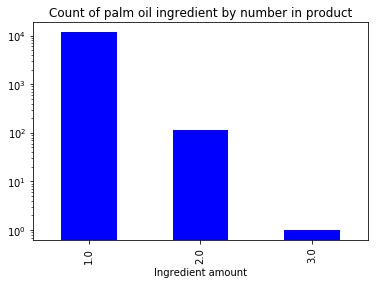

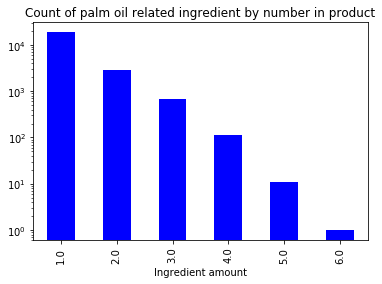

In [25]:
## Group by how many ingredients contain palm oil. and may contain. 
count_palm = contains_palm.groupby("ingredients_from_palm_oil_n")['count'].count()
count_may = may_contain_palm.groupby("ingredients_that_may_be_from_palm_oil_n")['count'].count()
count_palm.plot.bar(logy=True,title="Count of palm oil ingredient by number in product",color='b')
plt.xlabel("Ingredient amount")
plt.show()
count_may.plot.bar(logy=True,title="Count of palm oil related ingredient by number in product",color='b')
plt.xlabel("Ingredient amount")
plt.show()

- We can see that that most of the product seem to have only one ingredient or two that are related to palm oil
- However the product that may contains palm oil can have a little more ingredients. 

There is 11768 articles that contain palm oil.
There is 22433 articles that may contain palm oil 
The correlation between food that contains palm oil and that may contains palm oil is 0.193331 


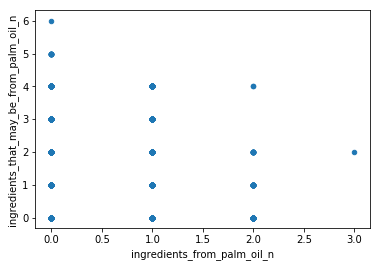

In [26]:
## One can wonder how much this represents in terms of relations. 
cnt_palm = contains_palm.shape[0] 
may_cnt_palm = may_contain_palm.shape[0]
print("There is %d articles that contain palm oil."%cnt_palm)
print("There is %d articles that may contain palm oil "%may_cnt_palm)
correlation = data["ingredients_from_palm_oil_n"].corr(data["ingredients_that_may_be_from_palm_oil_n"],method="pearson")
print("The correlation between food that contains palm oil and that may contains palm oil is %f " % correlation)

data.plot.scatter(x="ingredients_from_palm_oil_n",y="ingredients_that_may_be_from_palm_oil_n")
plt.show()

<p> We can't infer much as the scatter plots are not very helpful in visualize the data. Nut we can see that the correlation is low (less than 0.2) so there is not much relation between the number of ingredients and how many may contain palm oil.  </p>

### Origin of the palm oil food 

In [27]:
food_origin = pd.read_csv(DATAPATH+"food_origins.csv")
food_origin.set_index("code", inplace=True)
food_origin.head()

,origins_tags,origins_tags.1,manufacturing_places_tags
code,,,
0000000020114,NaN,NaN,france
0000000274722,france,france,france
0000000290616,quebec,quebec,brossard-quebec
0000000394710,quebec,quebec,brossard-quebec
0000001071894,france,france,united-kingdom


In [28]:
# Let us see first how much data we have available..
contains_palm.join(food_origin).shape[0], contains_palm.shape[0],food_origin.shape[0]

(11768, 11768, 86142)

In [29]:
## these operations are done to map the origin and do a value count on the origin..
joined = contains_palm.join(data["origins"],how='inner').dropna(subset=["origins"])
# this simulates flatmap ( explode from spark ) 
flatmap = joined["origins"].str.split(',').apply(pd.Series).unstack().dropna().to_frame()

flatmap.columns = ["origins"]
flatmap = flatmap.reset_index().set_index("code")
flatmap = flatmap[["origins"]]
flatmap = flatmap["origins"].value_counts()
# only take the ten most significant. 
top_ten = flatmap[flatmap > 5].nlargest(10)

- We notice that a lot of places seem to be from france. But we cant really see the trend as it is often in a bad format.

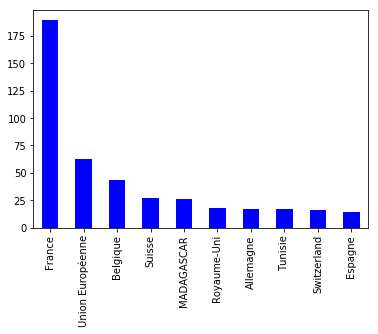

In [30]:
top_ten.plot.bar(color='b')

- Note that this is not 100% representative as the database is french so there are more products that come from France that are logged. 


#### Now we work on standarization of values..

To standardize a parameter $p$ we need to compute the ratio $r$ of a given country $x$. We do : 
\begin{equation}
r = \frac{x_{count\_p}}{x_{count\_total}} \\
x_{count\_total} = \sum_{a \in articles} a_{origin} = x\\
x_{count\_p}  = \sum_{a \in articles} a_{origin} = x \land a_p = p 
\end{equation}


In [31]:
## precomputation..
flatmap = flatmap.to_frame()
flatmap.columns = ["count"]

flatmap_all = flatmap_all.to_frame()
flatmap_all.columns = ["count"]

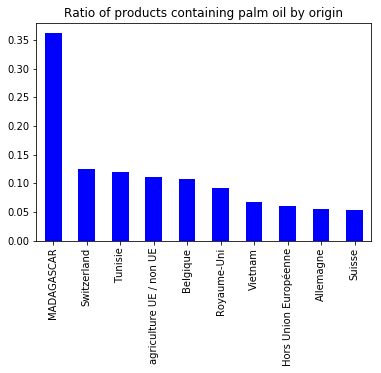

In [32]:
# join the two dataset and compute a ratio value. 
stand = flatmap.join(flatmap_all, lsuffix = "_palm", rsuffix ="_total")
stand["ratio"] = stand["count_palm"]/stand["count_total"]


stand_best = stand[stand["count_palm"] > 10].nlargest(10,"ratio")
stand_best["ratio"].plot.bar(color='b')
plt.title("Ratio of products containing palm oil by origin")
plt.show()

- After standardizing the values by how many articles from each origin, we can note that the major countries producing values containing palm oil are madagascar and switzerland. 

## Categories of aliment. 

we now investigate what time of aliments are more likely to contain palm oil. This can help future shoppers to be more wary around these type of articles and also helps us understand where the need for palm oil is the biggest.

In [33]:
join_categories = palm_oil_data.join(data["main_category_en"],how="inner").dropna(subset=["main_category_en"])
join_categories.head()

,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,main_category_en
code,,,,,,,
0000000005470,0.0,NaN,NaN,0.0,NaN,NaN,Plant-based foods and beverages
0000000020114,0.0,NaN,NaN,0.0,NaN,NaN,Dietary supplements
0000000274722,0.0,NaN,NaN,0.0,NaN,NaN,Meals
0000000290616,1.0,NaN,huile-de-palme,0.0,NaN,NaN,Plant-based foods and beverages
0000000394710,0.0,NaN,NaN,1.0,NaN,huile-vegetale,Sugary snacks


- Unfortunately this subset is a bit to small to work with.. let us try to expand to all categories. 

In [34]:
categories_contains = contains_palm.join(data["categories"],how="inner").dropna(subset=["categories"])
categories_may_contain = may_contain_palm.join(data["categories"],how="inner").dropna(subset=["categories"])

In [35]:
categories_may_contain.head()

,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,count,categories
code,,,,,,,,
0000000394710,0.0,NaN,NaN,1.0,NaN,huile-vegetale,1,"Snacks sucrés,Biscuits et gâteaux,Pâtisseries"
0000008237798,0.0,NaN,NaN,1.0,NaN,huile-vegetale,1,Quiches lorraines
0000010206515,1.0,NaN,huile-de-palme,1.0,NaN,e471-mono-et-diglycerides-d-acides-gras-alimen...,1,"Pâtes à sucre,Décorations,fr:Confiseries"
0000040144078,0.0,NaN,NaN,1.0,NaN,huile-vegetale,1,"Snacks sucrés,Confiseries,Confiseries chocolat..."
0000069160028,0.0,NaN,NaN,1.0,NaN,e471-mono-et-diglycerides-d-acides-gras-alimen...,1,Desserts glacés


In [36]:
categories_contains.head()

,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,count,categories
code,,,,,,,,
0000000290616,1.0,NaN,huile-de-palme,0.0,NaN,NaN,1,Légumes-feuilles
0000010206515,1.0,NaN,huile-de-palme,1.0,NaN,e471-mono-et-diglycerides-d-acides-gras-alimen...,1,"Pâtes à sucre,Décorations,fr:Confiseries"
0000069006562,1.0,NaN,huile-de-palme,0.0,NaN,NaN,1,"Surgelés,Rostis,Plats préparés surgelés"
00023092,1.0,NaN,huile-de-palme,0.0,NaN,NaN,1,"Cookies,Cookies aux noix de pécan"
00027083,1.0,NaN,huile-de-palme,3.0,NaN,"e481-stearoyl-2-lactylate-de-sodium,e472e-este...",1,Muffins à la myrtille


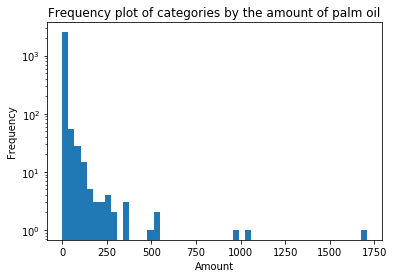

In [37]:
abc = categories_contains["categories"].str.split(',').apply(pd.Series).unstack().dropna().to_frame()#.reset_index().set_index("code").groupby("0")
abc.columns = ["categories"]
hi = abc.reset_index().set_index("code")["categories"].value_counts()
hi.plot.hist(bins=50,logy=True,title="Frequency plot of categories by the amount of palm oil")
plt.xlabel("Amount")
plt.show()

- One might wonder what are the biggest categories in term of palm oil consumption !

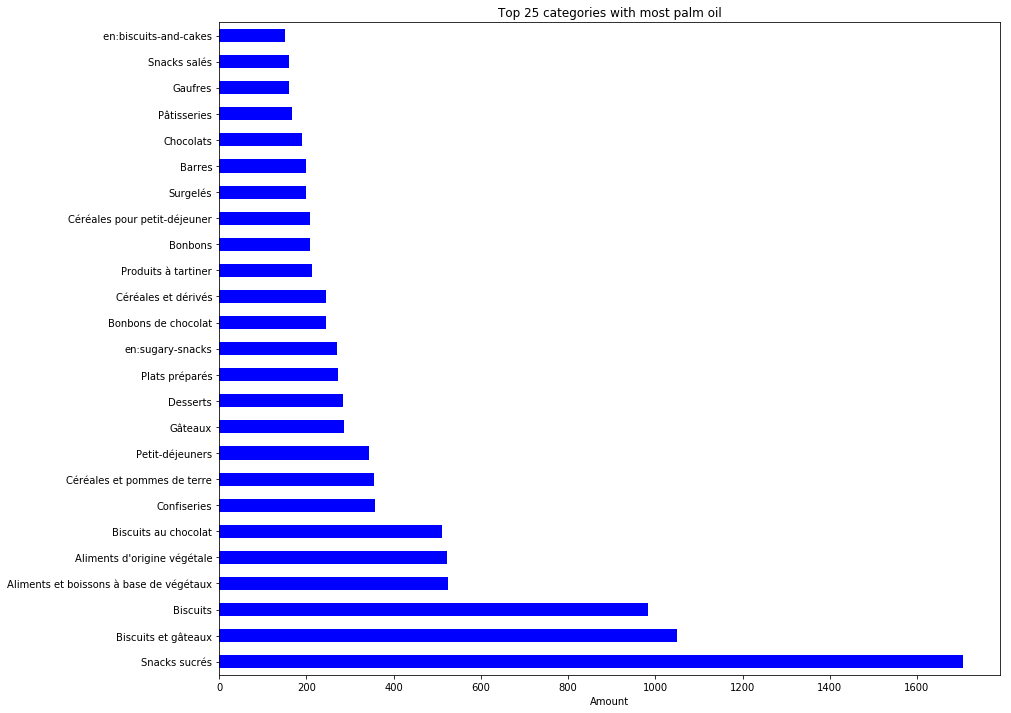

In [38]:
hi.nlargest(25).plot.barh(figsize=(14,12),color='b',title="Top 25 categories with most palm oil")
plt.xlabel("Amount")
plt.show()

- From this analysis we can see that most products that contain palm oil seem to be sweets and cookie derivated products. So if you want to help the Amazon you should be extra careful around sweet snacks. 

## Timeline of palm oil

- Now we want to investigate the tendency over time of products containing palm oil. If there is more or less of them over time. To do this we will refer to the first time they were added to the database, and see if more products that contain palm oil have been added lately. 

D:\Anaconda\envs\ada\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


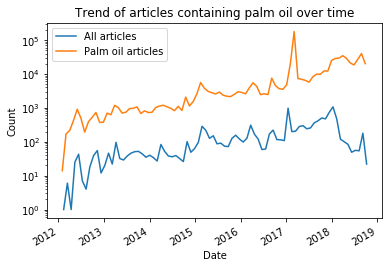

In [39]:
data["created_datetime"] = pd.to_datetime(data["created_datetime"],errors="coerce")
dateparsed = data[data["created_datetime"].notnull()]

### we create a dataset and then count by date. 
palm_dated = contains_palm.join(dateparsed["created_datetime"],how='inner')
palm_dated = palm_dated[["created_datetime"]].reset_index().set_index("created_datetime")#["code"].value_counts().to_frame()
palm_dated["count"] = 1

## resample to have 30days period. 
palm_dated = palm_dated["count"].resample("30D").sum()
palm_dated.plot.line(title="Trend of articles containing palm oil over time",logy=True)


## we also plot all articles to see the tendance in general. 
total_dated = dateparsed[["created_datetime"]].reset_index().set_index("created_datetime")
total_dated["count"] = 1
total_dated = total_dated["count"].resample("30D").sum()
total_dated.plot.line(logy=True)

plt.legend(["All articles","Palm oil articles"])
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

<p> We can see there are a few spikes that are explained as a user entering many different types of articles. Therefore there are not very statistically interesting. </p>

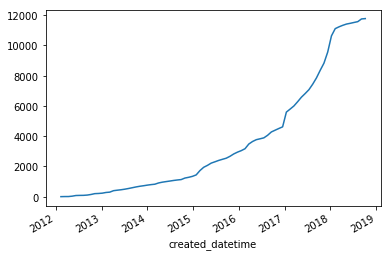

In [40]:
palm_dated.cumsum().plot.line()

<p> Here we notice a trend that is quadratic. So there seems to be more and more articles containing palm oil. </p>

# Vegan

In [41]:
vegan_data.head()
origin_lists=vegan_data.origins_tags.dropna().str.split(',')
origin_exploded=origin_lists.apply(pd.Series).unstack()
del origin_lists

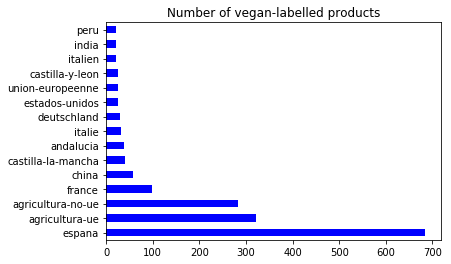

In [42]:
origin_exploded.value_counts().head(15).plot.barh(color='b')
plt.title('Number of vegan-labelled products')
plt.show()

In [43]:
total_origins=data.origins_tags.dropna().str.split(',')
total_origins_exploded=total_origins.apply(pd.Series).unstack()


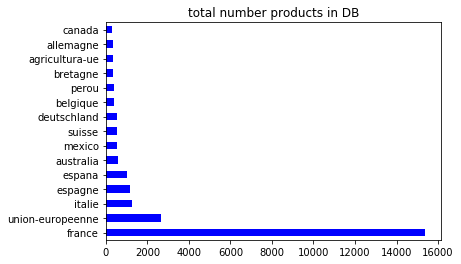

In [44]:
total_origins_exploded.value_counts().head()
total_origins_exploded.value_counts().head(15).plot.barh(color='b')
plt.title('total number products in DB')
plt.show()


<p>The bar chart above shows the bias of the data: way more data from france, and from european countries</p>

In [45]:
vegan_origin_df=origin_exploded.to_frame().reset_index().drop(labels=['level_0'],axis=1)
total_origin_df=total_origins_exploded.to_frame().reset_index().drop(labels=['level_0'],axis=1)

In [46]:
total_origin_df.columns=['level_1','origin']
total_origin_df=total_origin_df.dropna()
total_count=total_origin_df.groupby(by=['origin']).size().sort_values(ascending=False).to_frame()
vegan_origin_df.columns=['level_1', 'vegan_loc']
vegan_count=vegan_origin_df.groupby(by=['vegan_loc']).size().to_frame()
comparison=pd.merge(total_count,vegan_count,right_index=True,left_index=True,how='inner')


## Comment on data

The origins_tags series is messy.

First of all, same country entries are in different languange. The first approach is to deal with similar strings clustering: put together italy, italia and italien, but it would not work for austria osterreich as well as Germany Allemagne and Republica Federale Tedesca.

Another problem is the bias of the data base: it is a french data base, so will have more entries and more details for product from France, and frome Europe in a lower extend. To overcome that problem, we want to compare countries by their relative vegan production (vegan labelled production from one origin_tag over total production from the same).

But this solution shows a third problem: irrelevent tags. Some tags are to precise: regions or province, or even wrong ('soja' is not a country). For these tags are very rare, it is possible to have a confidence (the ratio that we talked about) of 100%: for instance, there is only one product tagged 'zamora-provincia' and this product is also tagged vegan, then 'zamora-provincia' will be the "vegan champion", but this is irrelevant to compare a precise province with entire country.

We addressed that last problem by thresholding the support (at 100 labbeled products), so we are sure to retrieve frequent countriews in the DB. Also we manually removed too general labelled because those can have a high support as well ('eu').

In [47]:
relevent_index=['aceitunas', 'afrique', 'agadir', 'agypten', 'alava', 'albacete-provincia', 'albatera', 'alemania', 'alicante', 'alicante-provincia', 'allemagne', 'almendras', 'almeria-provincia', 'almunecar', 'alps', 'amandes-d-italie', 'amazonas', 'amazonie', 'america-del-sur', 'amerique', 'amerique-centrale', 'amerique-du-nord', 'amerique-du-sud', 'andalucia', 'andes', 'angleterre', 'angleterre-betterave', 'aragon', 'aranjuez', 'argelia', 'argentina', 'argentinien', 'arroz', 'asie', 'asie-pour-le-fruit-de-moines', 'asturias', 'atlantico-suroeste', 'australia', 'austria', 'autol', 'autriche', 'avoine-francaise', 'azucar', 'azur-quelle', 'bajo-aragon', 'bali', 'batata', 'belgica', 'belgien', 'belgium', 'bolivia', 'bolivie', 'bolivien', 'bosnien-herzegowina', 'brazil', 'bresil', 'bretagne', 'burkina-faso', 'cacahuetes', 'cacao', 'caceres-provincia', 'cadiz-provincia', 'caldes-de-malavella', 'calera-y-chozas', 'california', 'californie', 'camargue', 'cambrils', 'cana-de-azucar', 'canada', 'casas-de-haro', 'castilla-la-mancha', 'castilla-y-leon', 'cataluna', 'cevennes', 'chile', 'china', 'chine', 'chufa', 'ciego-montero', 'cienfuegos', 'ciruelas', 'ciudad-real-provincia', 'col', 'col-lombarda', 'colombia', 'columbia', 'commerce-equitable', 'comunidad-valenciana', 'conil-de-la-frontera', 'cordoba-provincia', 'corea', 'costa-de-galicia', 'costa-de-marfil', 'costa-rica', 'cuba', 'cuenca-provincia', 'desconocido', 'deutschland', 'dominikanische-republik', 'e-u-a', 'ecuador', 'egipto', 'egnil', 'egypte', 'el-bolson', 'el-mirador', 'equateur', 'esmeraldas', 'espagne', 'espana', 'estados-unidos', 'etats-unis','eutschland', 'extremadura', 'filderstadt', 'filipinas', 'fontanilles', 'fougerolles', 'france', 'francia', 'frankreich', 'fresas', 'fuera-de-espana', 'galicia', 'gard', 'garray', 'germany', 'gerona-provincia', 'gers', 'gers-en-france-pour-le-ble', 'ghana', 'girona', 'golfo-de-vizcaya', 'granada-provincia', 'grece', 'grecia', 'greece', 'griechenland', 'guadalajara-provincia', 'haiti', 'haute-provence', 'herefordshire', 'holanda', 'hongrie','huelva-provincia', 'inde', 'india', 'indien', 'indien-landwirtschaft', 'indonesia', 'indonesie', 'indonesien', 'industria-argentina', 'ingrediente-s', 'iran', 'ireland', 'islas-canarias', 'israel', 'italia', 'italie', 'italien', 'italy', 'jaen', 'japon', 'jativa', 'kanada', 'kenia', 'kirgistan', 'kolumbien', 'la-coruna-provincia', 'la-mancha-comarca', 'la-manchuela-comarca', 'la-montiela-pedania', 'la-orotava', 'la-rioja', 'leimuiden', 'leinfelden-echterdingen', 'lerida-provincia', 'lombardia', 'lomellina', 'madagascar', 'madrid-comunidad-autonoma', 'malaga-provincia', 'malaui', 'manantial-amer-palatin', 'manantial-bezoya-de-trescasas', 'manantial-font-sacalm', 'manantial-fuente-primavera', 'manantial-fuentevera', 'manantial-siguenza', 'manantial-vichy-catalan', 'marinaleda', 'marruecos', 'mazarron', 'melocotones', 'mexico', 'mexiko', 'mexique', 'midlands-de-l-ouest', 'milano', 'minglanilla', 'minho-lima', 'modena', 'montricoux', 'montseny', 'moratilla-de-henares', 'motril', 'munchsteinach', 'murcia', 'murcia-comunidad-autonoma', 'mures-des-pays-bas', 'myrtilles-du-maroc', 'nao-ue', 'nardo', 'navarra', 'niederosterreich', 'niger', 'nijar','nueva-zelanda', 'osterreich', 'pais-vasco', 'pakistan', 'palmira', 'papua-neuguinea', 'paraguay', 'pavia-provincia', 'pays-bas', 'pepinillos', 'perou', 'peru', 'philippinen', 'philippines', 'pichincha-provincia', 'piemont', 'pioz', 'plano-tx', 'poland', 'polonia', 'portugal', 'quintanar-del-rey', 'regiao-do-norte', 'region-centro-norte', 'reino-unido', 'remolacha-y-zanahoria', 'republica-dominicana', 'republique-dominicaine', 'requena', 'requena-utiel-comarca', 'rheinland', 'ribera-del-jalon-comarca', 'rice', 'rio-negro', 'riz', 'romania', 'roumanie', 'royaume-uni', 'rugen', 'rumanien', 'salamanca-provincia', 'san-antonio-requena', 'sant-hilari-sacalm', 'santa-cruz-de-tenerife-provincia', 'santaella', 'santo-domingo', 'santo-tome-y-principe', 'sao-tome', 'sao-tome-und-principe', 'schweden', 'segovia-provincia', 'selva-comarca', 'serbia', 'sevilla-provincia', 'sicile', 'sierra-de-gredos', 'siguenza', 'slowakei', 'soja', 'soja-bio', 'soja-de-france', 'soja-de-francia', 'soja-europeen', 'soja-origine-france', 'soja-sud-est', 'soria-provincia', 'south-africa', 'south-africa-local-and-imported', 'spain', 'spanien', 'sri-lanka', 'sud-est-de-la-france', 'sud-ouest', 'sud-ouest-de-la-france', 'sudafrica', 'sudafrika', 'sudamerica', 'sudamerika', 'suisse', 'switzerland', 'tailandia', 'tanzania', 'tanzanie', 'tarn-et-garonne', 'tarragona-provincia', 'thailand', 'thailande', 'toledo-provincia', 'tomates', 'tozeur', 'trentino-alto-adigio', 'trescasas', 'trinidad', 'trinidad-und-tobago', 'tunesien', 'tunez', 'tunisia', 'tunisie', 'turkei', 'turquia', 'turquie', 'uca', 'ucrania', 'ue', 'ue-non-ue', 'uganda', 'ukraine',  'united-kingdom', 'united-states', 'united-states-of-america', 'usa', 'usa-and-other-unspecified-countries', 'val-venosta', 'valencia', 'valencia-provincia', 'valladolid-provincia', 'vancouver-bc', 'various', 'venezie', 'venezuela', 'verin', 'viana-do-castelo', 'viana-do-castelo-distrito', 'vietnam', 'villa-del-prado', 'villalgordo-del-jucar', 'villamalea', 'villanueva-de-la-jara', 'waldviertel', 'west-indies', 'wiesbaum', 'yuca', 'zamora-provincia', 'zaragoza-provincia' ] 
relevent_comparison=comparison.loc[relevent_index]
relevent_comparison=relevent_comparison[relevent_comparison['0_x']>100]
del relevent_index

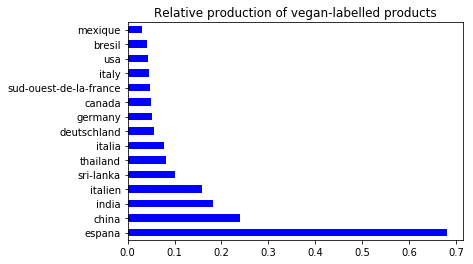

In [48]:
relevent_comparison['ratio']=relevent_comparison['0_y']/relevent_comparison['0_x']
relevent_comparison.ratio.sort_values(ascending=False).head(15).plot.barh(color='b')
plt.title('Relative production of vegan-labelled products')
plt.show()

## Comment on observations

Spain is the country that produce the higher part of vegan product relatively to its total production.

Let's check the categories of products coming from spain compared to production of the other leading countries. 



## Categories analysis

In [49]:
data__=data.dropna(subset=['origins_tags'])
data__.loc[:,'unique_origin']=''


D:\Anaconda\envs\ada\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda\envs\ada\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [50]:
data__.loc[data__.origins_tags.str.contains('espana'),'unique_origin']='espana'
data__.loc[data__.origins_tags.str.contains('italien'),'unique_origin']='italien'
data__.loc[data__.origins_tags.str.contains('china'),'unique_origin']='china'
data__.loc[data__.origins_tags.str.contains('india'),'unique_origin']='india'
data__.loc[data__.origins_tags.str.contains('sri-lanka'),'unique_origin']='sri-lanka'

In [51]:
data__=data__[data__['unique_origin']!='']
data__.unique_origin.unique()

array(['china', 'sri-lanka', 'india', 'italien', 'espana'], dtype=object)

In [52]:
to_plot=data__.groupby(by=['unique_origin','main_category_en'])['unique_origin'].count()
del data__


In [53]:
data__=vegan_data.dropna(subset=['origins_tags'])
data__.loc[:,'unique_origin']=''
data__.loc[data__.origins_tags.str.contains('espana'),'unique_origin']='espana'
data__.loc[data__.origins_tags.str.contains('italien'),'unique_origin']='italien'
data__.loc[data__.origins_tags.str.contains('china'),'unique_origin']='china'
data__.loc[data__.origins_tags.str.contains('india'),'unique_origin']='india'
data__.loc[data__.origins_tags.str.contains('sri-lanka'),'unique_origin']='sri-lanka'
data__=data__[data__['unique_origin']!='']
data__.unique_origin.unique()
vegan_to_plot=data__.groupby(by=['unique_origin','main_category_en'])['unique_origin'].count()
del data__

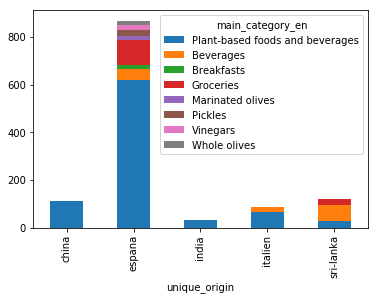

In [54]:
#threshold is here in order not be ugly with too many labels
to_plot[to_plot>15].unstack('main_category_en').fillna(0).plot(kind='bar',stacked=True)

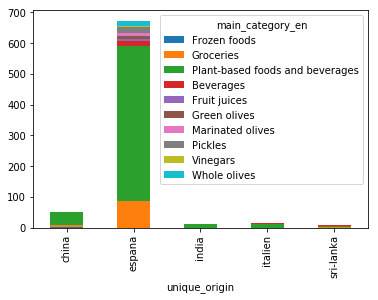

In [55]:
vegan_to_plot[to_plot>11].unstack('main_category_en').fillna(0).plot(kind='bar',stacked=True)

## Comment on observations

Both total and vegan production of plant-based food  and beverages represent the majority of spanish production. 



## Time evolution

In [56]:
vegan_data["created_datetime"] = pd.to_datetime(vegan_data["created_datetime"],errors="coerce")
dateparsed = vegan_data[vegan_data["created_datetime"].notnull()]
vegan_date=dateparsed.reset_index().set_index('created_datetime')

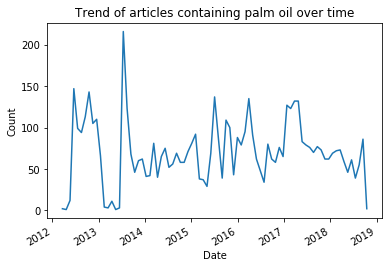

In [57]:
vegan_date["count"] = 1
vegan_date = vegan_date["count"].resample("30D").sum()
vegan_date.plot.line(title="Trend of articles containing palm oil over time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

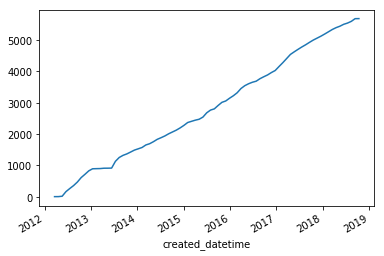

In [58]:
vegan_date.cumsum().plot.line()
plt.show()

The total ammount of vegan products increases in a linear was, suggesting that the rate of vegan produced food is consant.

## Vegan products are less caloric

In [59]:
print(vegan_data['energy_100g'].dropna().describe())
print(non_vegan_data['energy_100g'].dropna().describe())

count    4659.000000
mean     1055.675694
std       860.834737
min         0.000000
25%       270.450000
50%       839.000000
75%      1653.000000
max      4402.000000
Name: energy_100g, dtype: float64
count    8.359900e+04
mean     1.149885e+03
std      6.526818e+03
min      0.000000e+00
25%      4.080000e+02
50%      1.046000e+03
75%      1.640000e+03
max      1.841546e+06
Name: energy_100g, dtype: float64


The description suggest that vegan products are less energetic than non-vegan ones. Let's try some statistic tests.

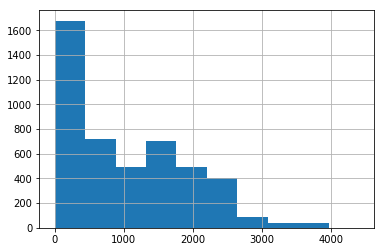

In [60]:
vegan_data['energy_100g'].dropna().hist()

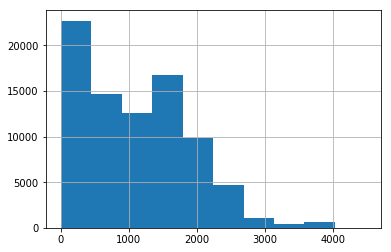

In [61]:
#discarding too high values
non_vegan_series=non_vegan_data['energy_100g'].dropna()
non_vegan_series[non_vegan_series<4500].hist()


the distributions are not normal, so we cannot run classical t-test to compare the different distribution

In [62]:
print("Vegan and non-vegan have same distribution: ")
print(scipy.stats.mannwhitneyu(vegan_data['energy_100g'].dropna(),non_vegan_series[non_vegan_series<4500],alternative='two-sided'))
print("\nVegan products are more energetic: ")
print(scipy.stats.mannwhitneyu(vegan_data['energy_100g'].dropna(),non_vegan_series[non_vegan_series<4500],alternative='less'))
print("\nNon-vegan products are more energetic: ")
print(scipy.stats.mannwhitneyu(vegan_data['energy_100g'].dropna(),non_vegan_series[non_vegan_series<4500],alternative='greater'))

Vegan and non-vegan have same distribution: 
MannwhitneyuResult(statistic=182530097.0, pvalue=9.599463470124489e-13)

Vegan products are more energetic: 
MannwhitneyuResult(statistic=182530097.0, pvalue=4.799731735062244e-13)

Non-vegan products are more energetic: 
MannwhitneyuResult(statistic=182530097.0, pvalue=0.99999999999952)


The Mann-Whitney U test, also known as Wilcoxon test, is non-parametric test based on ranks. The null-hypothesis is that the the two samples come from the same distribution. Here the p-value is quasi 0, so the null-hypothesis is rejected

This test can also be used to test wether the distribution of sample one will asymptotically come from a normal distribution with a higher mean than the other sample.

The hypothesis "Vegan products are more energetic" is rejected, hypothesis "non-vegan products are more energetic" since the p-value is almost 1.

## Vegan Label are less fat

In [63]:
print(vegan_data['fat_100g'].dropna().describe())
print(non_vegan_data['fat_100g'].dropna().describe())

count    4622.000000
mean       13.381840
std        18.963632
min         0.000000
25%         0.800000
50%         4.000000
75%        20.000000
max       102.000000
Name: fat_100g, dtype: float64
count    82627.000000
mean        13.546998
std         30.456529
min          0.000000
25%          1.000000
50%          6.100000
75%         21.000000
max       6500.000000
Name: fat_100g, dtype: float64


The description above also suggests that there is less fat in vegan product

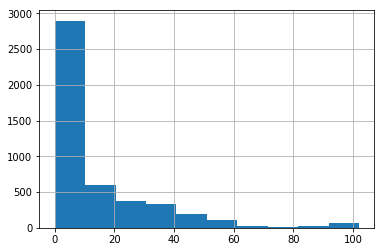

In [64]:
vegan_data['fat_100g'].dropna().hist()

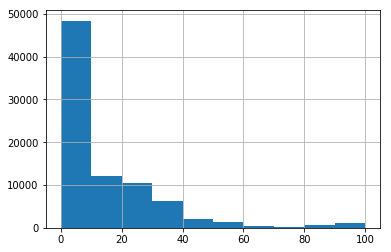

In [65]:
#removing outliers
non_vegan_series=non_vegan_data['fat_100g'].dropna()
non_vegan_series[non_vegan_series<120].hist()

In [66]:
print("Vegan and non-vegan have same distribution: ")
print(scipy.stats.mannwhitneyu(vegan_data['fat_100g'].dropna(),non_vegan_series[non_vegan_series<120],alternative='two-sided'))
print("\nVegan products are more fat: ")
print(scipy.stats.mannwhitneyu(vegan_data['fat_100g'].dropna(),non_vegan_series[non_vegan_series<120],alternative='less'))
print("\nNon-vegan products are more fat: ")
print(scipy.stats.mannwhitneyu(vegan_data['fat_100g'].dropna(),non_vegan_series[non_vegan_series<120],alternative='greater'))

Vegan and non-vegan have same distribution: 
MannwhitneyuResult(statistic=184114173.0, pvalue=4.5200481498045497e-05)

Vegan products are more fat: 
MannwhitneyuResult(statistic=184114173.0, pvalue=2.2600240749022748e-05)

Non-vegan products are more fat: 
MannwhitneyuResult(statistic=184114173.0, pvalue=0.9999773998176233)


In a similar way, the conclusion is that vegan product contain less fat, although the difference is less radical.

In [67]:
print("correlation between energy and fat in vegan data:")
print(correlation_columns('energy_100g','fat_100g',dataset=vegan_data))
print("\ncorrelation between energy and fat in non vegan data:")
print(correlation_columns('energy_100g','fat_100g',dataset=non_vegan_data))

correlation between energy and fat in vegan data:
SpearmanrResult(correlation=0.789358884812714, pvalue=0.0)

correlation between energy and fat in non vegan data:
SpearmanrResult(correlation=0.7386667587455663, pvalue=0.0)


The fact the conclusions are the same for energy and fat is related to the fact that the correlation is conserved

# EcoLabels

In [68]:
data = pd.read_csv(DATAPATH+'labels.csv',delimiter=',',low_memory=False)
data.set_index('code',inplace=True)
data.shape

(99655, 3)

In [69]:
data_total = pd.read_csv(DATAPATH+'cleaned_unique_index.csv',delimiter=',',low_memory=False)
data_total.set_index('code',inplace=True)

In [70]:
data.head()

,labels,labels_tags,labels_en
code,,,
0000000020114,Fabriqué en France,en:made-in-france,Made in France
0000000274722,"Viande Française,Fabriqué en France","fr:viande-francaise,en:made-in-france","fr:Viande Française,Made in France"
0000003444009,Contient des OGM,en:contains-gmos,Contains GMOs
0000005200016,AB,"en:organic,en:eu-organic,fr:ab-agriculture-bio...","Organic,EU Organic,fr:AB Agriculture Biologique"
0000007020254,"Kascher,Contient des OGM","en:kosher,en:contains-gmos","Kosher,Contains GMOs"


In [71]:
# We do a 'flatmap' trick...
label_flatted = data["labels_en"].str.split(',').apply(pd.Series).unstack().dropna().to_frame()
label_flatted.head()

0
  code                              
0 0000000020114       Made in France
  0000000274722  fr:Viande Française
  0000003444009        Contains GMOs
  0000005200016              Organic
  0000007020254               Kosher

In [72]:
label_flatted.columns = ["labels"]
label_flatted = label_flatted.reset_index().set_index("code")
label_flatted = label_flatted[["labels"]]

In [73]:
label_flatted = label_flatted[["labels"]]
label_flatted.head()

,labels
code,
0000000020114,Made in France
0000000274722,fr:Viande Française
0000003444009,Contains GMOs
0000005200016,Organic
0000007020254,Kosher


In [74]:
organic = label_flatted[label_flatted["labels"].str.contains("Organic")]
organic = organic[~organic.index.duplicated()] ## We don't want to many. 

In [75]:
cnt_organic = organic.shape[0]
total_cnt = data_total.shape[0]
percentage = cnt_organic / total_cnt
print("There are %d articles with label organic" % cnt_organic)
print("This represents %f %% of articles " % percentage)

There are 37395 articles with label organic
This represents 0.056175 % of articles 


In [76]:
bio = label_flatted[label_flatted["labels"].str.contains("Bio")]
bio = bio[~bio.index.duplicated()] ## We don't want to many. 
bio.head()

,labels
code,
0018627740001,Bio
0221109418736,it:Bio
02516101,fr:Biogroupe
0621456277183,fr:Biologique-avec-legumes
11044204,fr:Bio7


In [77]:
cnt_organic = organic.shape[0]
cnt_bio = bio.shape[0]
total_cnt = data_total.shape[0]
percentage_organic = cnt_organic / total_cnt
percentage_bio = cnt_bio / total_cnt
print("There are %d articles with label organic" % cnt_organic)
print("This represents %f %% of articles " % percentage_organic)
print("There are %d articles with label bio" % cnt_bio)
print("This represents %f %% of articles " % percentage_bio)

There are 37395 articles with label organic
This represents 0.056175 % of articles 
There are 13886 articles with label bio
This represents 0.020859 % of articles 


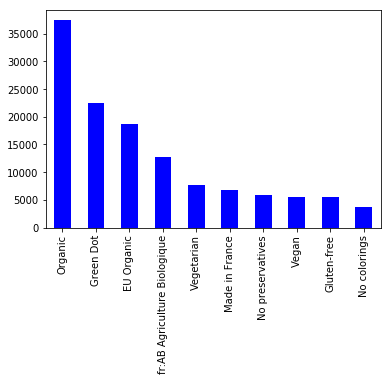

In [78]:
label_flatted["labels"].value_counts().nlargest(10).plot.bar(color='b')
plt.show()

- We can see that the most popular label is organic, there are also a lot of articles having the green dot label which is depicted below for people who do not know what it is. 
- In order here are the most popular labels, unfortunately having an organic label is not a real label. It is a wide concept. Agriculture biologique is a french label. 
<img src="img/eu_organic.jpg" alt="EU Organic" width = 60 height = 60>
<img src="img/green_dot.svg" alt="Green Dot" width = 60 height = 60>
<img src="img/agri_bio.png" alt="Agriculture biologique" width = 60 height = 60>

- We now focus on those three mentionned label to see where we can find them most. 

In [79]:
top_4 = label_flatted["labels"].value_counts().nlargest(4)
top_4 = list(top_4.index)
top_4_articles = label_flatted[label_flatted["labels"].apply(lambda r : r in top_4)]

In [80]:
top_4_all = top_4_articles.join(data_total["origins"], how="inner",lsuffix="l",rsuffix="r").dropna(subset=["origins"])
top_4_all.head()

,labels,origins
code,,
00028202,Green Dot,Royaume-Uni
00035460,Green Dot,Vietnam
00042611,Organic,?
00042611,EU Organic,?
00042611,fr:AB Agriculture Biologique,?


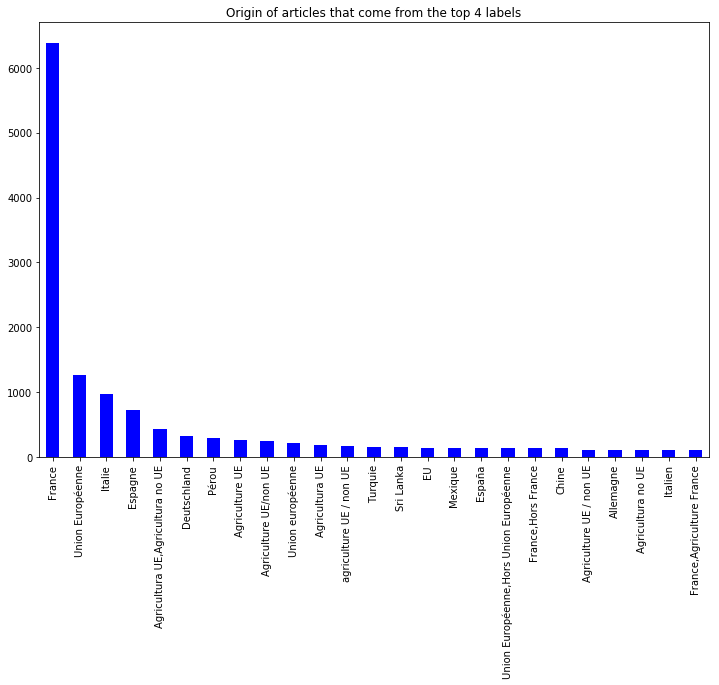

In [81]:
top_4_all["origins"].value_counts().nlargest(25).plot.bar(figsize=(12,8),title="Origin of articles that come from the top 4 labels",color='b')

- We can see that most products come from France however there are a number of articles that come way further than france, it will be interesting to see to study where they are being sold, but this will be done in depth in an other study. 

## Normalization magic 
- We redo the same analysis as done in the palm oil <a href="http://localhost:8888/notebooks/ada_project/Milestone2.ipynb#Now-we-work-on-standarization-of-values.."> here </a>

In [82]:
flatmap = top_4_all["origins"].value_counts().to_frame().head()
flatmap.columns = ["count"]

In [83]:
flatmap.head()

,count
France,6380
Union Européenne,1263
Italie,966
Espagne,734
"Agricultura UE,Agricultura no UE",441


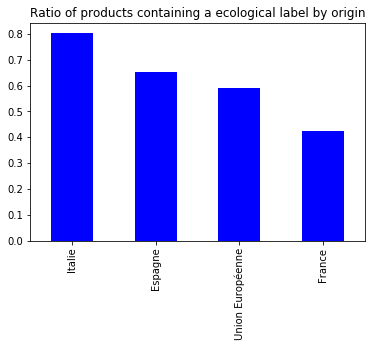

In [84]:
stand = flatmap.join(flatmap_all, lsuffix = "_label", rsuffix ="_total")
stand["ratio"] = stand["count_label"]/stand["count_total"]
stand_best = stand.nlargest(10,"ratio")
stand_best["ratio"].plot.bar(color='b')
plt.title("Ratio of products containing a ecological label by origin")
plt.show()

- This yields only for nations which is a fairly small sample size. 